In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN

In [2]:
data = pd.read_csv("Telecom_data.csv")

In [3]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
data = data.drop("customerID",axis=1)
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='Churn'>

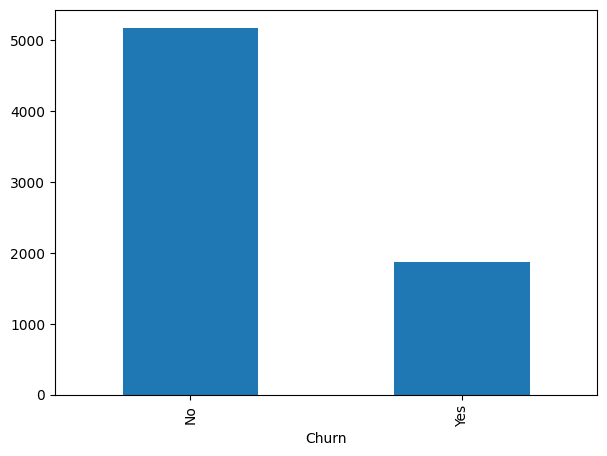

In [5]:
data['Churn'].value_counts().plot(kind = 'bar', figsize = (7,5))

In [6]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
a = data['Churn'].value_counts()
total_val = data['Churn'].count()
total_val

7043

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
#coerce indicates if there is something which cannot be converted to numeric it is treated as NAN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

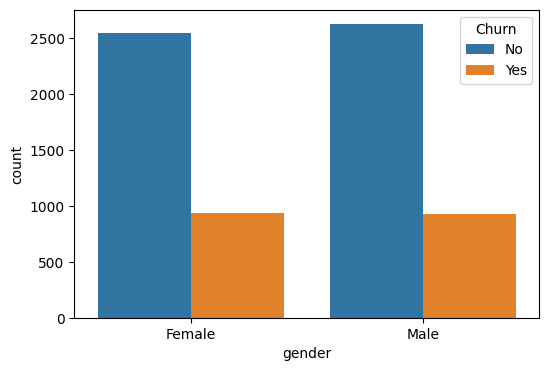

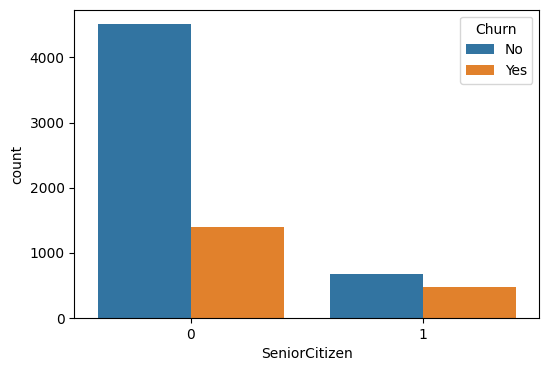

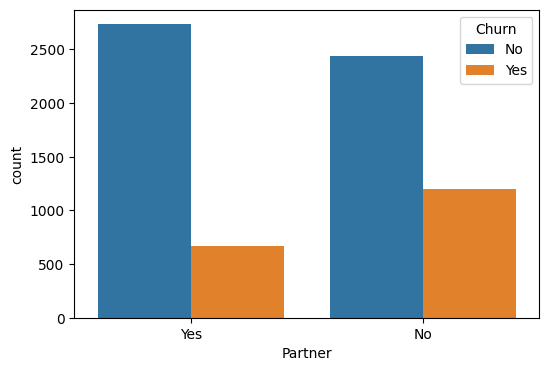

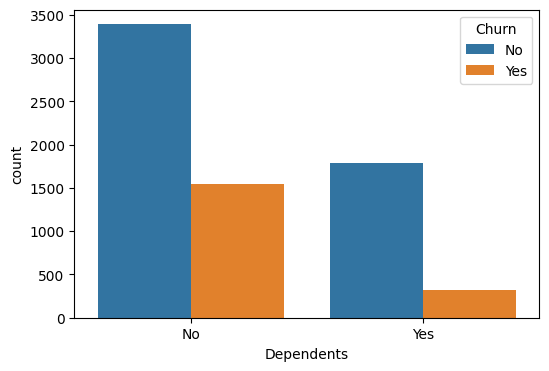

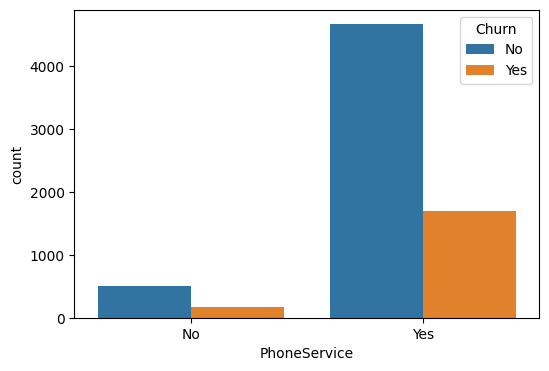

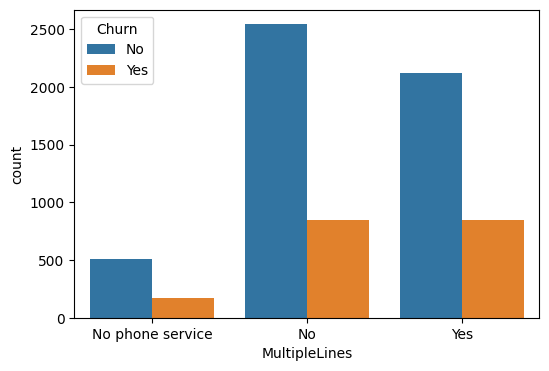

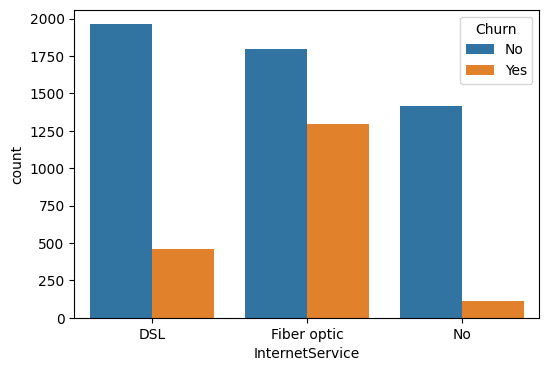

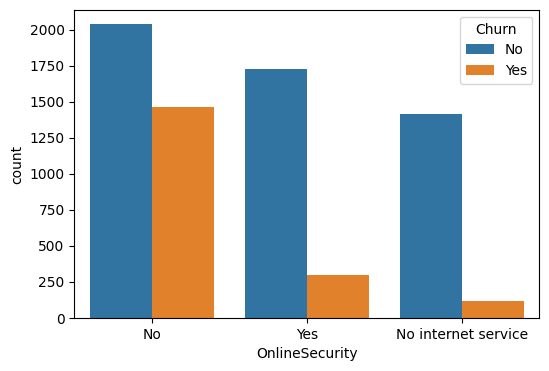

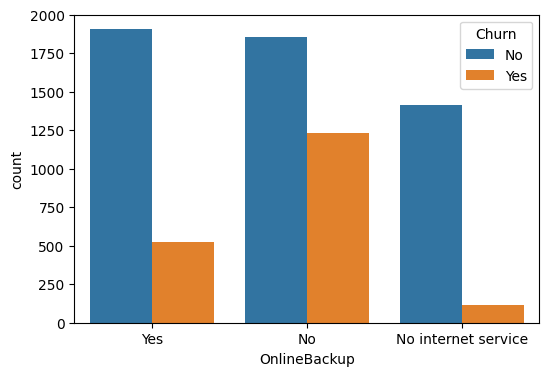

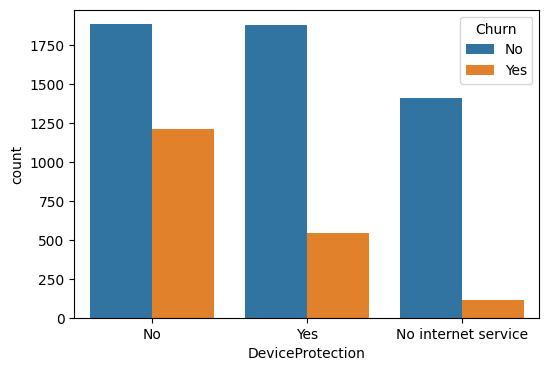

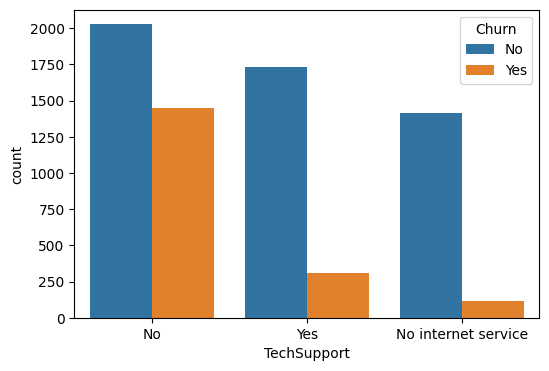

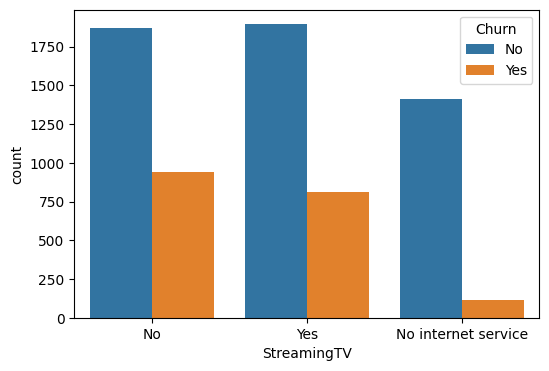

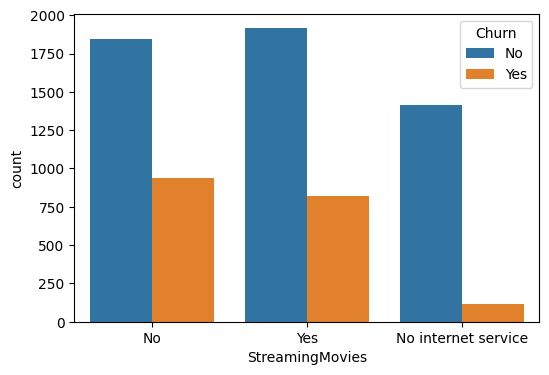

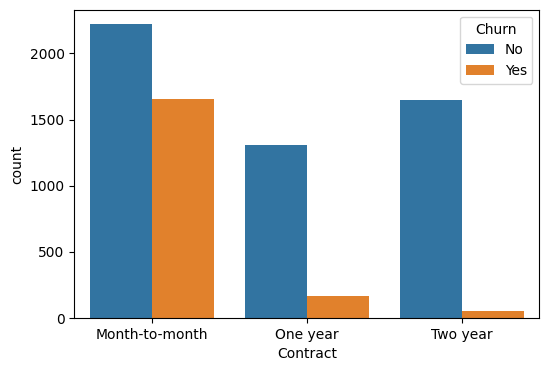

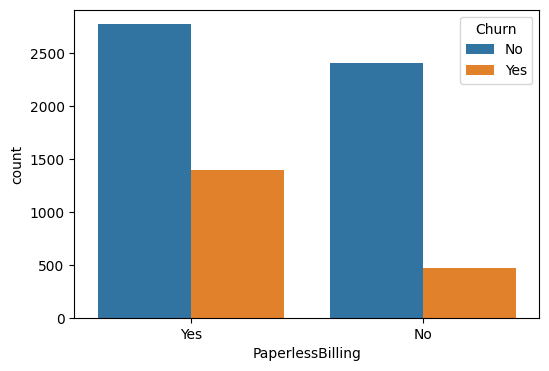

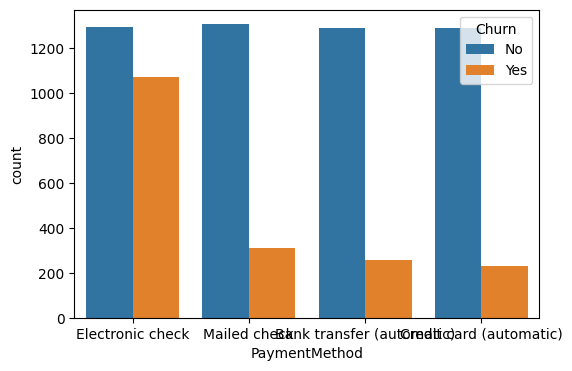

In [10]:
analysis_data = data.drop(columns = ['tenure' , 'MonthlyCharges' , 'TotalCharges' , 'Churn'])
for i,pred in enumerate(analysis_data):
  plt.figure(i , figsize =(6,4))
  sns.countplot(data = data , x=pred , hue = 'Churn')

In [11]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
mean_charges = int(data['TotalCharges'].mean())
mean_charges

2283

In [13]:
# Modifying NAN values
# data.dropna(how = 'any',inplace = True)
data['TotalCharges'] = data['TotalCharges'].fillna( mean_charges)
data['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#It avoids potential confusion if 'Churn' was one-hot encoded into two separate columns, which is unnecessary for a binary target.
data['Churn'] = np.where(data.Churn == 'No',0,1)
data = pd.get_dummies(data).astype(int)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29,29,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56,1889,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53,108,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42,1840,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70,151,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<Axes: >

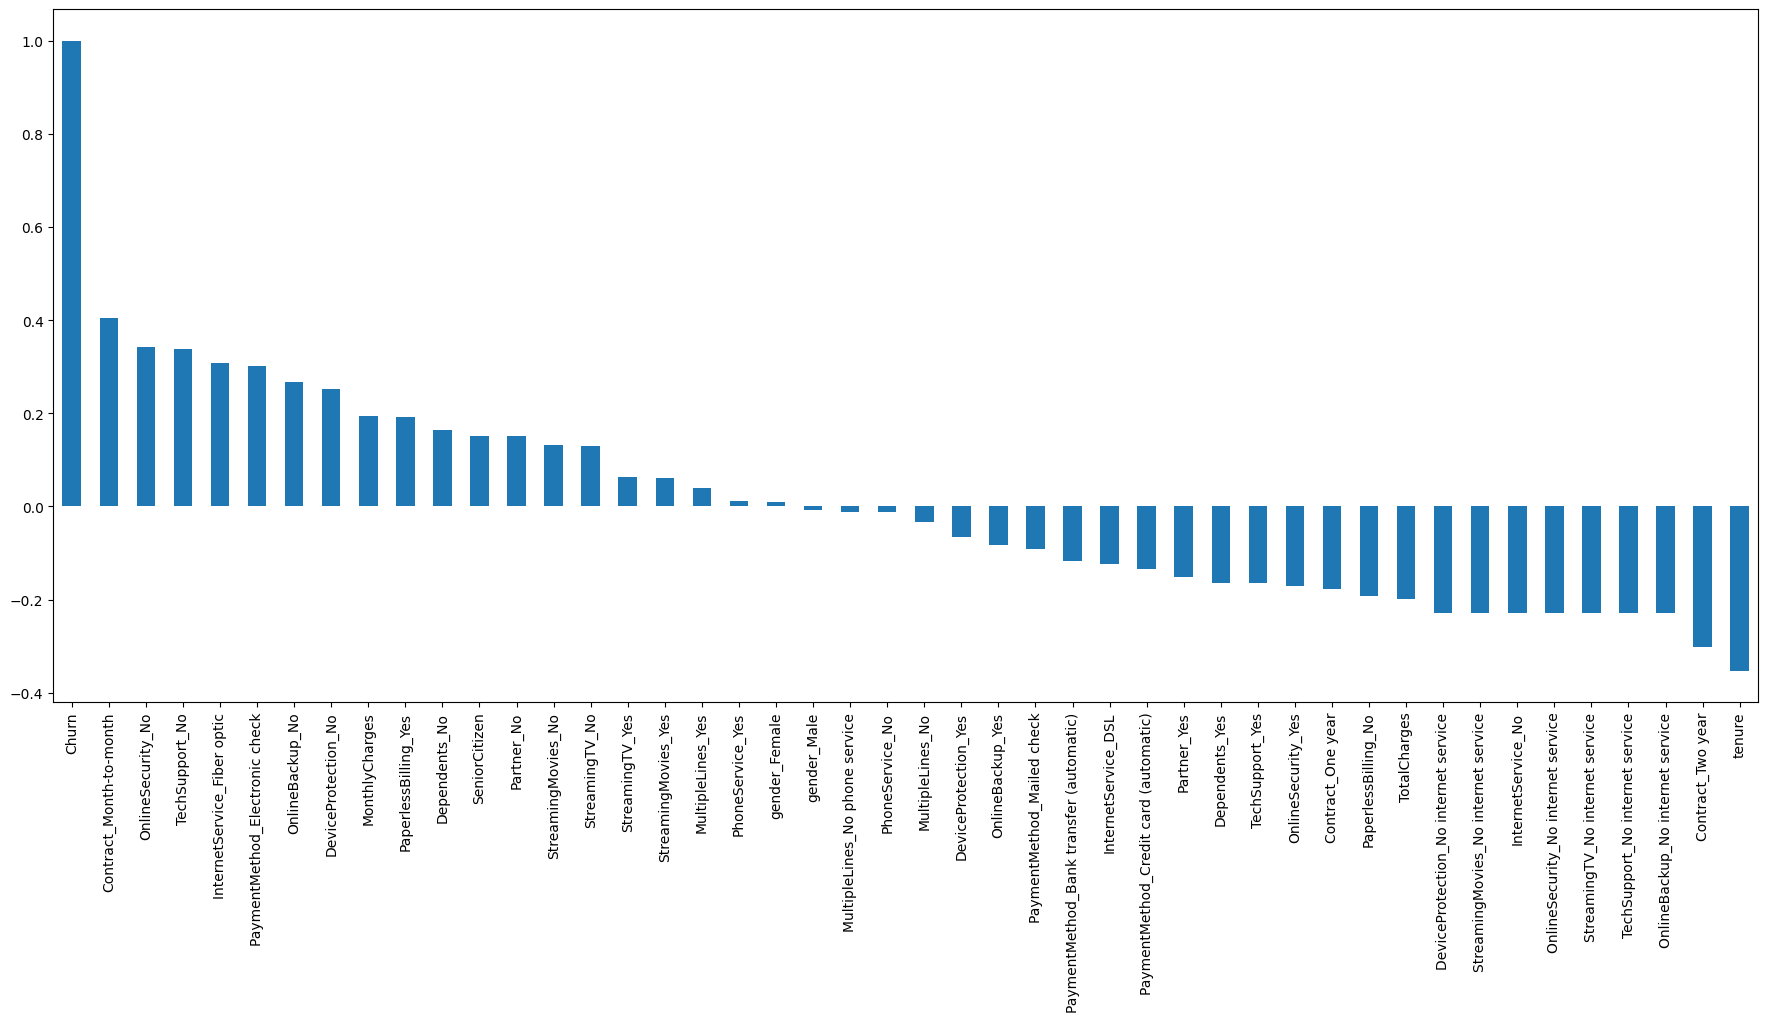

In [16]:
plt.figure(figsize = (22,9))
data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [17]:
x = data.drop('Churn',axis=1)
y = data.Churn

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [36]:
# model = DecisionTreeClassifier( criterion = 'gini' , random_state = 100,max_depth=6, min_samples_leaf = 10)
# model = RandomForestClassifier( n_estimators=100 , criterion = 'gini' , random_state = 100,max_depth=6, min_samples_leaf = 10)
# model = SVC(kernel = 'linear', random_state=35)
model = LogisticRegression(max_iter = 500)

In [37]:
model.fit(x_train,y_train)

C:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [38]:
y_predict = model.predict(x_test)
model.score(x_test,y_test)

0.8112136266855926

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1029
           1       0.67      0.59      0.63       380

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [50]:
data['Churn'].value_counts()*100/len(data)

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64

In [51]:
model_sm = SMOTEENN(random_state = 35)
x_updated , y_updated = model_sm.fit_resample(x,y)

In [52]:
xx_train , xx_test , yy_train , yy_test = train_test_split(x_updated, y_updated, test_size =0.25)

In [53]:
# model_smote = DecisionTreeClassifier( criterion = 'gini' , random_state = 100,max_depth=6, min_samples_leaf = 10)
model_smote = RandomForestClassifier( criterion = 'gini' , random_state = 100,max_depth= 9, min_samples_leaf = 10)
# model_smote = LogisticRegression(max_iter = 5000) 

In [54]:
model_smote.fit(xx_train, yy_train)
yy_predict = model_smote.predict(xx_test)
model_smote.score(xx_test, yy_test)

0.95578231292517

In [55]:
print(classification_report(yy_test, yy_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       678
           1       0.95      0.97      0.96       792

    accuracy                           0.96      1470
   macro avg       0.96      0.95      0.96      1470
weighted avg       0.96      0.96      0.96      1470



In [30]:
import pickle

fname = 'Churn.pkl'
pickle.dump(model_smote , open(fname,'wb'))


In [31]:
model_columns = xx_train.columns.tolist()

with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

In [32]:
load_m = pickle.load(open(fname , 'rb'))

In [33]:
score = load_m.score(xx_test, yy_test)
score

0.9503401360544218

In [1]:
import pickle

# Load the trained model
model_path = 'Churn.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)
